In [1]:
#############################################################################
# DATA EXPLORATION
#    1. Frequency Histogram of items
#############################################################################
import os
os.chdir('/tf/shared')
from tqdm import tqdm

100%|██████████| 260087/260087 [00:05<00:00, 45924.49it/s]


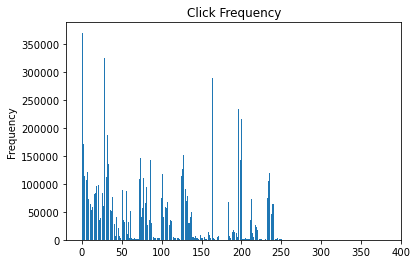

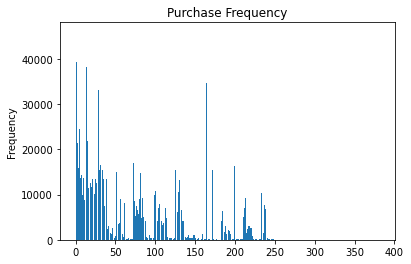

In [34]:
### 1. Frequency Histogram of clicked and purchased items
### Read data from train set, then create frequency count of items
### Then sort frequencies to draw histogram
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from classes.Items import Items
N_ITEMS = 382
items = Items()

# read data to pd dataframe
trainSet = pd.read_csv('/tf/shared/trainset.csv',' ')

clickFreq = [0]*N_ITEMS  # frequency array for clicking
purchFreq = [0]*N_ITEMS  # frequency array for purchase

# iterate thru data and parse items clicked
# parse by comma first, then delete everthing after colon
for line in tqdm(trainSet.user_click_history):
    clickSeries = line.split(',')
    itemList = [item.partition(':')[0] for item in clickSeries]
    for item in itemList:
        # increment frequency
        item = int(item)
        clickFreq[item] = clickFreq[item] + 1

# iterate thru data and parse items purchased
# parse items exposed by comma, then check if purchased in column 'labels'
for r in tqdm(range(trainSet.shape[0])):
    temp = trainSet.exposed_items[r]
    exposedItems = temp.split(',')
    temp = trainSet.labels[r]
    labels = temp.split(',')
    # increment purchase frequency if label==1
    for i in range(len(exposedItems)):
        if int(labels[i])==1:
            purchFreq[int(exposedItems[i])] = purchFreq[int(exposedItems[i])] + 1

# sort the two frequency arrays decreasing
# clickFreq.sort(reverse = True)
# purchFreq.sort(reverse = True)

# draw the two histograms
plt.bar(list(range(N_ITEMS)), clickFreq)
plt.ylabel("Frequency")
plt.title("Click Frequency")
plt.show()

plt.bar(list(range(N_ITEMS)), purchFreq)
plt.ylabel("Frequency")
plt.title("Purchase Frequency")
plt.show()

In [ ]:
# check if items' location match item order (sanity check location)
for r in tqdm(range(trainSet.shape[0])):
    temp = trainSet.exposed_items[r]
    exposedItems = temp.split(',')
    for itemID in exposedItems:
        if int(itemID)==221:
            print(temp)
            break

100%|██████████| 260087/260087 [00:05<00:00, 45416.52it/s]


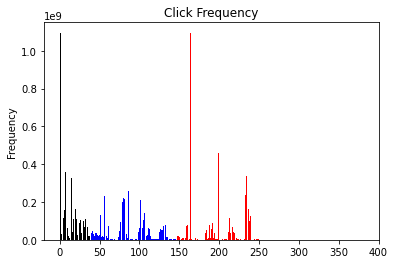

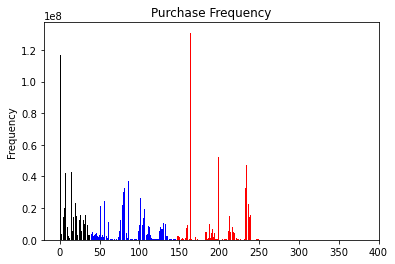

In [122]:
### 1. Frequency Histogram of clicked and purchased items
### Read data from train set, then create frequency count of items
### Then sort frequencies to draw histogram
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from classes.Items import Items
N_ITEMS = 382
items = Items()

# read data to pd dataframe
trainSet = pd.read_csv('/tf/shared/trainset.csv',' ')

clickFreq = [0]*N_ITEMS  # frequency array for clicking
purchFreq = [0]*N_ITEMS  # frequency array for purchase

# iterate thru data and parse items clicked
# parse by comma first, then delete everthing after colon
for line in tqdm(trainSet.user_click_history):
    clickSeries = line.split(',')
    itemList = [item.partition(':')[0] for item in clickSeries]
    for item in itemList:
        # increment frequency
        item = int(item)
        if item==0:
            continue
        clickFreq[item] = clickFreq[item] + 1

# iterate thru data and parse items purchased
# parse items exposed by comma, then check if purchased in column 'labels'
for r in tqdm(range(trainSet.shape[0])):
    temp = trainSet.exposed_items[r]
    exposedItems = temp.split(',')
    temp = trainSet.labels[r]
    labels = temp.split(',')
    # increment purchase frequency if label==1
    for i in range(len(exposedItems)):
        if int(labels[i])==1:
            purchFreq[int(exposedItems[i])] = purchFreq[int(exposedItems[i])] + 1

# sort the two frequency arrays decreasing
# clickFreq.sort(reverse = True)
# purchFreq.sort(reverse = True)

colors = ['0']*N_ITEMS
for i in range(1, N_ITEMS):
    loc = items.getItemLocation(i)
    if loc == 1:
        colors[i] = 'black'
    elif loc == 2:
        colors[i] =  'blue'
    else:
        colors[i] = 'red'
    clickFreq[i] *= items.getItemPrice(i)
    purchFreq[i] *= items.getItemPrice(i)
    
# draw the two histograms
plt.bar(list(range(N_ITEMS)), clickFreq, color = colors)
plt.ylabel("Frequency")
plt.title("Click Frequency")
plt.show()

plt.bar(list(range(N_ITEMS)), purchFreq, color = colors)
plt.ylabel("Frequency")
plt.title("Purchase Frequency")
plt.show()

In [123]:
for i in range(150, 250):
    print(i, purchFreq[i])

150 1700943
151 272853
152 80460
153 630696
154 892212
155 713605
156 606108
157 196344
158 976744
159 7508858
160 9488360
161 1118890
162 434231
163 208851
164 130846611
165 660528
166 225267
167 324649
168 146000
169 72000
170 1736520
171 7754808
172 108367000
173 273265
174 62181
175 68900
176 62600
177 98592
178 50758
179 56804
180 39210
181 67999
182 45325
183 4914000
184 5150400
185 789600
186 276000
187 1340000
188 9980800
189 1020800
190 4252800
191 3840000
192 6860800
193 1542400
194 4076800
195 476800
196 25016800
197 284000
198 256800
199 52259200
200 114076800
201 388800
202 168000
203 128000
204 646400
205 1337600
206 684800
207 291200
208 473600
209 375906
210 453132
211 7988800
212 5696800
213 14840000
214 4713600
215 1910400
216 3998400
217 8341184
218 5051200
219 4324800
220 7571200
221 7801252
222 1174400
223 386073
224 351000
225 219200
226 163200
227 328000
228 153600
229 151962
230 358400
231 290594
232 316800
233 32822400
234 47033600
235 44182712
236 1185600
237 

100%|██████████| 260087/260087 [00:02<00:00, 91688.06it/s]


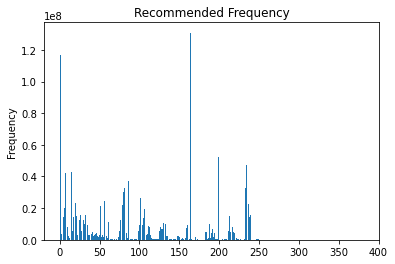

In [124]:
# count recommended frequencies
recFreq = [0]*N_ITEMS
for r in tqdm(range(trainSet.shape[0])):
    temp = trainSet.exposed_items[r]
    exposedItems = temp.split(',')
    for i in exposedItems:
        recFreq[int(i)] += 1

plt.bar(list(range(N_ITEMS)), purchFreq)
plt.ylabel("Frequency")
plt.title("Recommended Frequency")
plt.show()


<ipython-input-125-d518dfd24554>:3: RuntimeWarning: divide by zero encountered in true_divide
  clickPurch_cr = np.array(purchFreq) / np.array(clickFreq)
<ipython-input-125-d518dfd24554>:3: RuntimeWarning: invalid value encountered in true_divide
  clickPurch_cr = np.array(purchFreq) / np.array(clickFreq)
<ipython-input-125-d518dfd24554>:4: RuntimeWarning: invalid value encountered in true_divide
  purchFreq_cr = np.array(purchFreq) / np.array(recFreq)


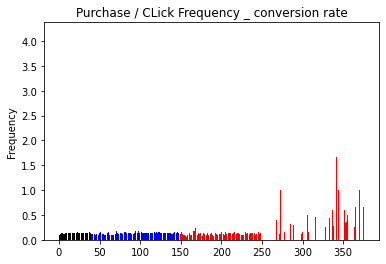

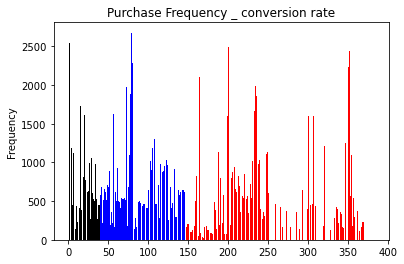

In [125]:
# conversion rate
import numpy as np
clickPurch_cr = np.array(purchFreq) / np.array(clickFreq)
purchFreq_cr = np.array(purchFreq) / np.array(recFreq)

plt.bar(list(range(N_ITEMS)), clickPurch_cr, color = colors)
plt.ylabel("Frequency")
plt.title("Purchase / CLick Frequency _ conversion rate")
plt.show()

plt.bar(list(range(N_ITEMS)), purchFreq_cr, color = colors)
plt.ylabel("Frequency")
plt.title("Purchase Frequency _ conversion rate")
plt.show()

In [130]:
for i in range(150, 250):
    if purchFreq_cr[i]> 1000:
        print(i, purchFreq_cr[i], purchFreq[i])

164 2105.674460894754 130846611
172 2454.0740069749536 108367000
188 1128.5391225689734 9980800
199 1604.8151332760103 52259200
200 2489.0750801859003 114076800
217 1003.6318132595355 8341184
230 1012.4293785310734 358400
233 1664.5907292828888 32822400
234 1992.8647091224948 47033600
235 1856.4164705882354 44182712
237 1235.5357575090768 22459569
239 1034.2515284991125 15732000
241 1429.6697736351532 1073682
248 1113.6564705882354 473304
249 1128.358208955224 378000


In [ ]:
print('click:')
for itemID in tqdm(range(1, 381)):
    if clickFreq[itemID]>0.2*1e9:
        print(str(itemID) + ' ' + str(clickFreq[itemID]))
        
print('purchase:')
for itemID in tqdm(range(1, 381)):
    if purchFreq[itemID]>1*1e7:
        print(str(itemID) + ' ' + str(purchFreq[itemID]))

In [15]:
for __x__ in tqdm(trainSet.exposed_items):
    itemList = __x__.split(',')
    for itemID in itemList:
        if int(itemID)==381:
            print(__x__)

100%|██████████| 260087/260087 [00:00<00:00, 475195.07it/s]

26,4,3,81,127,51,239,199,381
6,5,20,81,111,61,220,381,200
38,8,30,107,128,51,237,200,381
7,6,21,61,136,133,200,381,233


In [41]:
###################################################################################
# one hot encoding for purchased items
import numpy as np
N_SAMPLES = trainSet.shape[0]
N_ITEMS = 382  # there is no item 0
purchase_OHE = np.zeros(shape = (N_SAMPLES, N_ITEMS))  # dimension N_SAMPLES * N_ITEMS
for rowID in tqdm(range(N_SAMPLES)):
    recItems = trainSet.exposed_items[rowID].split(',')
    purLabels = trainSet.labels[rowID].split(',')
    for j in range(9):
        itemID = int(recItems[j])
        if int(purLabels[j])==1:
            purchase_OHE[rowID, itemID] = 1



100%|██████████| 260087/260087 [00:06<00:00, 42132.11it/s]


In [106]:
import pandas as pd
import scipy.stats as ss
import tensorflow as tf

def cramers_v(x, y):
    confusion_matrix = tf.math.confusion_matrix(x,y) + 1
    confusion_matrix = np.array(confusion_matrix)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

corr_matrix = np.zeros(shape = (N_ITEMS, N_ITEMS))
for i in tqdm(range(1, 55)):
    for j in (range(i+1, 55)):
        corr_matrix[i,j] = cramers_v(purchase_OHE[:,i], purchase_OHE[:,j])



100%|██████████| 54/54 [00:28<00:00,  1.89it/s]


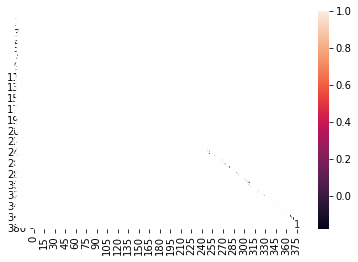

In [48]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# purchase_OHE_pd = pd.DataFrame(purchase_OHE)
# corr_matrix = purchase_OHE_pd.corr()


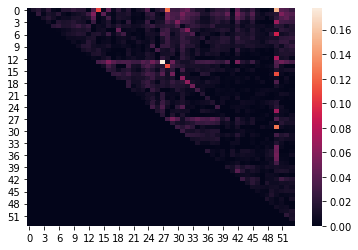

In [112]:
corr_matrix_small  = corr_matrix[1:55,1:55]
sns.heatmap(corr_matrix_small, annot = False)
plt.show()

In [114]:
criminals = [220, 221, 240, 196, 238, 218, 239, 233, 214]
criminals = [ 7, 35, 51, 80, 107, 172, 199, 221]
for i in range(len(criminals)):
    for j in range(i, len(criminals)):
        print(criminals[i], criminals[j], corr_matrix[criminals[i], criminals[j]])

7 7 0.0
7 35 0.0
7 51 0.090991102187037
7 80 0.0
7 107 0.0
7 172 0.0
7 199 0.0
7 221 0.0
35 35 0.0
35 51 0.04994628509621796
35 80 0.0
35 107 0.0
35 172 0.0
35 199 0.0
35 221 0.0
51 51 0.0
51 80 0.0
51 107 0.0
51 172 0.0
51 199 0.0
51 221 0.0
80 80 0.0
80 107 0.0
80 172 0.0
80 199 0.0
80 221 0.0
107 107 0.0
107 172 0.0
107 199 0.0
107 221 0.0
172 172 0.0
172 199 0.0
172 221 0.0
199 199 0.0
199 221 0.0
221 221 0.0


In [2]:
### 1. Frequency Histogram of clicked and purchased items
### Read data from train set, then create frequency count of items
### Then sort frequencies to draw histogram
import pandas as pd
import matplotlib.pyplot as plt
N_ITEMS = 380

# read data to pd dataframe
trainSet = pd.read_csv('../shared/trainset.csv',' ')

clickFreq = [0]*N_ITEMS  # frequency array for clicking
purchFreq = [0]*N_ITEMS  # frequency array for purchase

# iterate thru data and parse items clicked
# parse by comma first, then delete everthing after colon
for line in trainSet.user_click_history:
    clickSeries = line.split(',')
    itemList = [item.partition(':')[0] for item in clickSeries]
    for item in itemList:
        # increment frequency
        item = int(item)
        clickFreq[item] = clickFreq[item] + 1

# iterate thru data and parse items purchased
# parse items exposed by comma, then check if purchased in column 'labels'
for r in range(trainSet.shape[0]):
    temp = trainSet.exposed_items[r]
    exposedItems = temp.split(',')
    temp = trainSet.labels[r]
    labels = temp.split(',')
    # increment purchase frequency if label==1
    for i in range(len(exposedItems)):
        if int(labels[i])==1:
            purchFreq[int(exposedItems[i])] = purchFreq[int(exposedItems[i])] + 1



[0, 39454, 21437, 14680, 15887, 24629, 13653, 14265, 9563, 9863, 13753, 8881, 7308, 8511, 38340, 21808, 11432, 10821, 13761, 12673, 11675, 13415, 5208, 5822, 10115, 13481, 12556, 8619, 45858, 33099, 15360, 16664, 26174, 19922, 15351, 13465, 7576, 7149, 11159, 13565, 2490, 3064, 554, 4917, 1479, 1312, 2606, 688, 304, 418, 850, 14947, 4392, 4177, 3557, 3633, 9046, 1144, 4270, 1259, 537, 8140, 305, 254, 275, 200, 326, 142, 171, 189, 120, 172, 14265, 16923, 8620, 5380, 7501, 15498, 6691, 5698, 9117, 14717, 4028, 4734, 9172, 5140, 20603, 4155, 4183, 636, 481, 535, 415, 963, 382, 449, 397, 389, 294, 10006, 10821, 14861, 6024, 4134, 7104, 7896, 7688, 9114, 4101, 3362, 3783, 4759, 4527, 6978, 4874, 609, 402, 422, 446, 467, 396, 385, 266, 233, 458, 15431, 17792, 19301, 6082, 10685, 13266, 9185, 10241, 6706, 4099, 4118, 5669, 6520, 619, 486, 556, 502, 1019, 358, 381, 458, 258, 297, 970, 1087, 417, 497, 36, 264, 499, 205, 106, 27, 83, 1351, 980, 410, 89, 129, 34643, 297, 357, 113, 73, 9, 696, 732

In [3]:
for itemID in range(380):
    print('itemID: '+str(itemID) + '  freq: ' + str(purchFreq[itemID]))

itemID: 0  freq: 0
itemID: 1  freq: 39454
itemID: 2  freq: 21437
itemID: 3  freq: 14680
itemID: 4  freq: 15887
itemID: 5  freq: 24629
itemID: 6  freq: 13653
itemID: 7  freq: 14265
itemID: 8  freq: 9563
itemID: 9  freq: 9863
itemID: 10  freq: 13753
itemID: 11  freq: 8881
itemID: 12  freq: 7308
itemID: 13  freq: 8511
itemID: 14  freq: 38340
itemID: 15  freq: 21808
itemID: 16  freq: 11432
itemID: 17  freq: 10821
itemID: 18  freq: 13761
itemID: 19  freq: 12673
itemID: 20  freq: 11675
itemID: 21  freq: 13415
itemID: 22  freq: 5208
itemID: 23  freq: 5822
itemID: 24  freq: 10115
itemID: 25  freq: 13481
itemID: 26  freq: 12556
itemID: 27  freq: 8619
itemID: 28  freq: 45858
itemID: 29  freq: 33099
itemID: 30  freq: 15360
itemID: 31  freq: 16664
itemID: 32  freq: 26174
itemID: 33  freq: 19922
itemID: 34  freq: 15351
itemID: 35  freq: 13465
itemID: 36  freq: 7576
itemID: 37  freq: 7149
itemID: 38  freq: 11159
itemID: 39  freq: 13565
itemID: 40  freq: 2490
itemID: 41  freq: 3064
itemID: 42  freq: 